# Régression linéaire pénalisée

Dans ce notebook, vous découvrirez comment utiliser la régression linéaire pénalisée L1 (Lasso), L2 (Ridge) et L1 + L2 (Elasticnet).

Ces pénalités intégrées à la fonction de coût vous aideront à entraîner des modèles moins complexes pour éviter le sur-apprentissage.

# Importation des packages

In [1]:
import pandas as pd
import seaborn as sns
# Importation of the data for our regression example
#from sklearn.datasets import load_boston

# Importation of the function to standardize the data
from sklearn.preprocessing import StandardScaler

# Importation of the train_test_split function which split randomly our data 
# into a train and test set
from sklearn.model_selection import train_test_split

# Importation of the linear regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Importation of the performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importation of the maplotlib package to create graphics
import matplotlib.pyplot as plt

# Importation of numpy to use of vectors, matrices, tensors.
import numpy as np 

# Importation des données

In [2]:
# Data frame for ou regression example
#boston = load_boston()
boston = pd.read_csv('BostonHousing.csv') 

In [3]:
#print(boston.DESCR)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
#boston['data'].shape
boston.shape

(506, 14)

In [6]:
#boston['feature_names']
boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
#BostonData = pd.DataFrame(boston.data)
#BostonData.head()
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
#BostonData = pd.DataFrame(boston.data,columns=boston.feature_names)
#BostonData.head()

In [9]:
#BostonData.shape

In [10]:
#BostonData['MEDV'] = boston.target
#BostonData.head(5)


In [11]:
#boston['target'].shape
boston['medv'].shape

(506,)

In [12]:
#BostonData.info()

In [13]:
#BostonData.isnull().sum()
display(boston.isnull().any())
display(boston.isnull().sum())

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

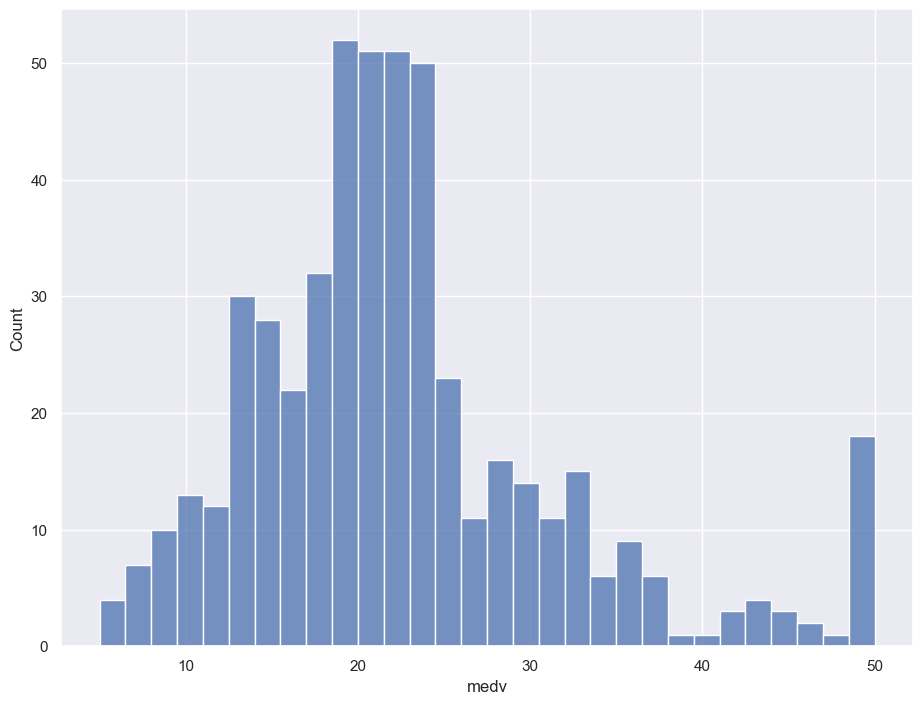

In [14]:
sns.set(rc={'figure.figsize':(11,8.27)})
#sns.distplot(BostonData['MEDV'], bins=30)
#sns.distplot(boston['medv'], bins=30)
sns.histplot(boston['medv'], bins=30)
plt.show()


<Axes: >

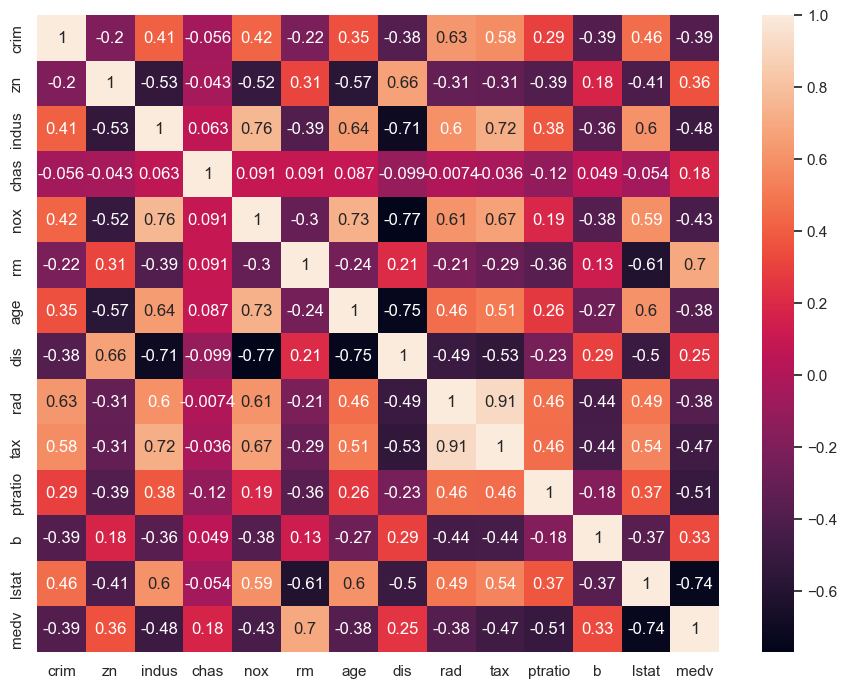

In [15]:

#correlation_matrix = BostonData.corr()
correlation_matrix = boston.corr()

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [16]:
#---Obtenir les 3 caractéristiques les plus corrélées.---
#print(BostonData.corr().abs().nlargest(3, 'MEDV').index)
print(boston.corr().abs().nlargest(3, 'medv').index)

#---Imprimer les 3 plus grandes valeurs de corrélation---
#print(BostonData.corr().abs().nlargest(3, 'MEDV').values[:,13])
print(boston.corr().abs().nlargest(3, 'medv').values[:,13])

Index(['medv', 'lstat', 'rm'], dtype='object')
[1.         0.73766273 0.69535995]


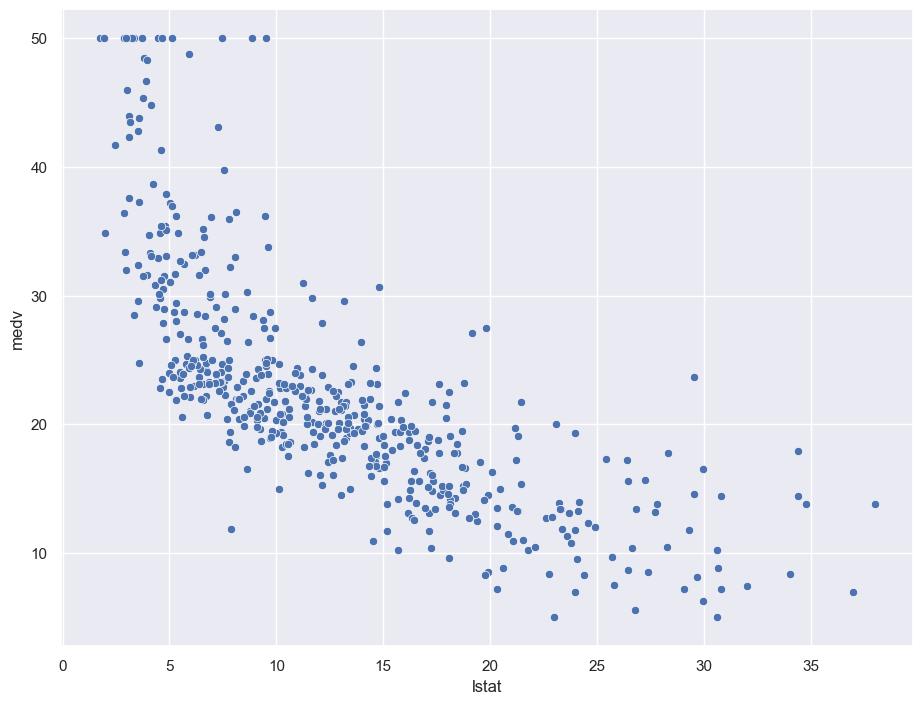

In [17]:
#sns.scatterplot(x='LSTAT', y='MEDV', data=BostonData)
sns.scatterplot(x='lstat', y='medv', data=boston)

plt.show()

Text(0, 0.5, 'MEDV')

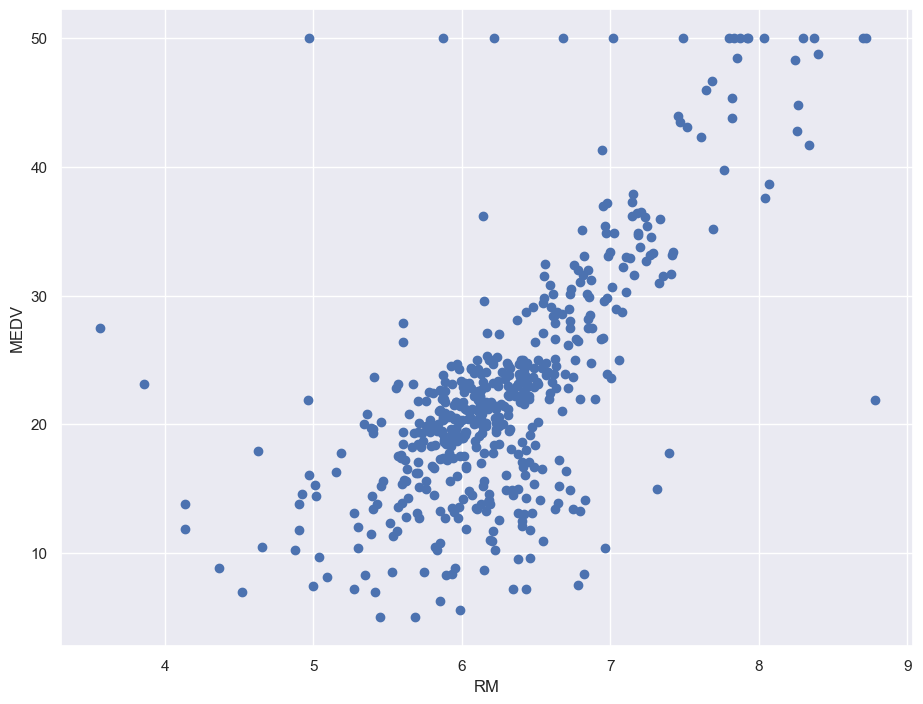

In [18]:
#plt.scatter(BostonData['RM'], BostonData['MEDV'], marker='o')
plt.scatter(boston['rm'], boston['medv'], marker='o')

plt.xlabel('RM')
plt.ylabel('MEDV')


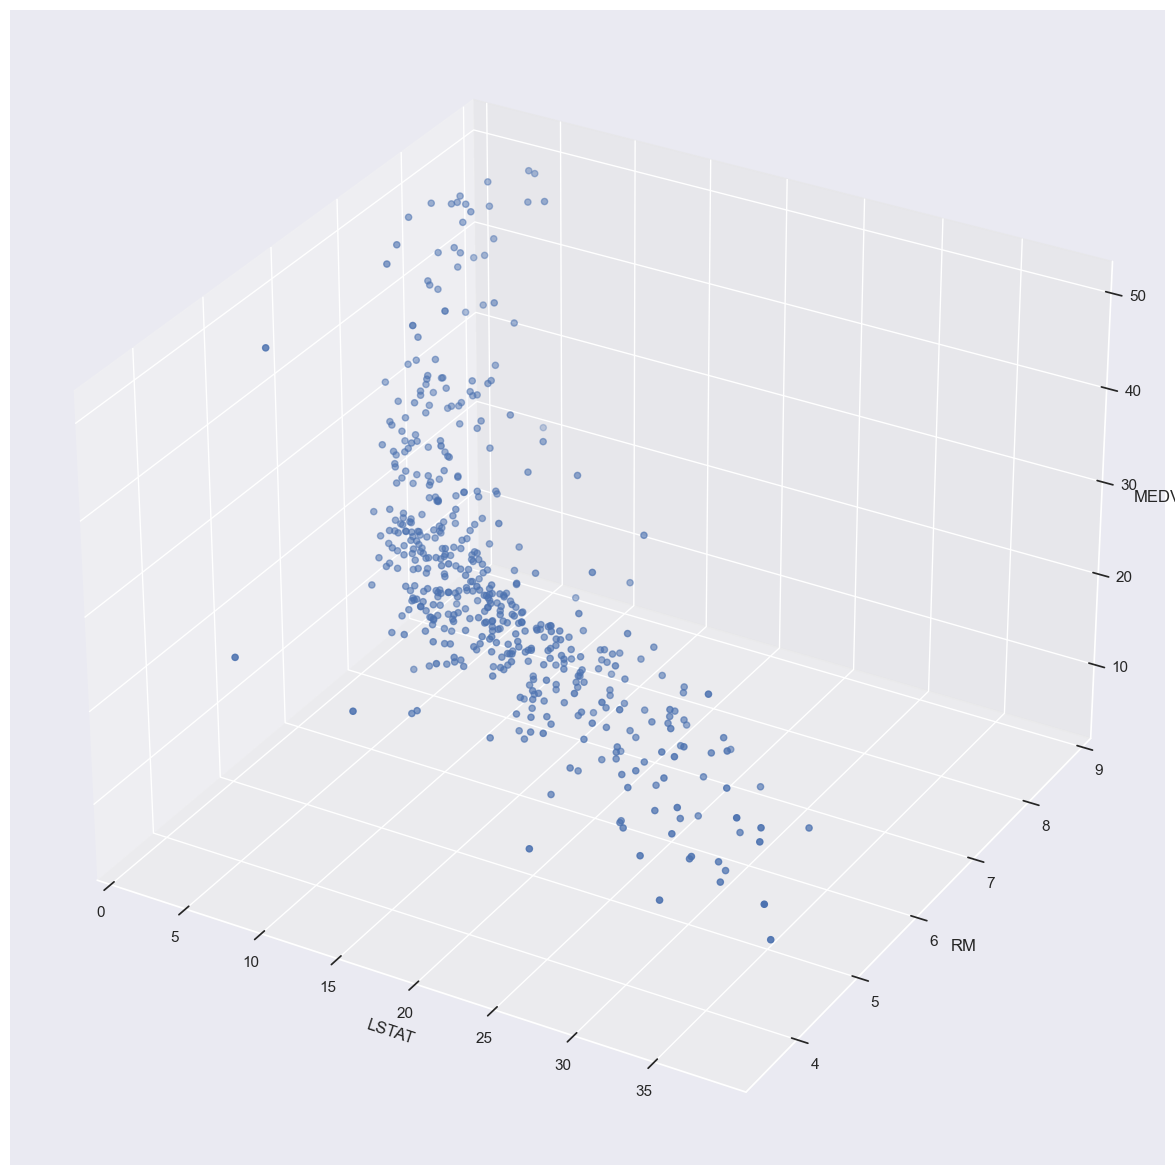

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(BostonData['LSTAT'], BostonData['RM'], BostonData['MEDV'], c='b')
ax.scatter(boston['lstat'],
 boston['rm'],
 boston['medv'],
 c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [20]:
#X_reg = boston.data[:,]
# Sélectionner toutes les lignes et toutes les colonnes sauf la dernière
X_reg = boston.iloc[:, :-1]
#y_reg = boston.target
# La dernière colonne est considérée comme votre variable cible Y_reg
y_reg = boston.iloc[:, -1]
print(X_reg.shape)
print(boston.shape)
print(X_reg.head())

(506, 13)
(506, 14)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [21]:

#X_reg = pd.DataFrame(np.c_[BostonData['LSTAT'], BostonData['RM']], columns = ['LSTAT','RM'])
#y_reg = BostonData['MEDV']
#X_reg.shape

In [22]:
# Use the function train_test_split to create your train and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, 
                                                                    test_size=0.20, 
                                                                    random_state=123)

# Normalisation des données


In [23]:
# Initialize the StandardScaler function
scaler = StandardScaler()

# Fit the StandardScaler on the trainig set
scaler.fit(X_train_reg)

# Standardization of the training set
X_train_reg_norm = scaler.transform(X_train_reg)

# Standardization of the validation set
X_test_reg_norm = scaler.transform(X_test_reg)


# Initialisation des modèles

In [24]:
reg = LinearRegression()

Fonction de coût de la régression Lasso :

$ J(w) =  \frac{1}{2m}[\sum^m_{i=1}(\hat{y}^{(i)}-y^{(i)})^2+\alpha\sum^n_{j=1}|w_j|$ 



In [25]:
lasso = Lasso(alpha=0.1, random_state=123)

Fonction de coût de la régression Ridge :

$ J(w) =  \frac{1}{2m}[\sum^m_{i=1}(\hat{y}^{(i)}-y^{(i)})^2+\alpha\sum^n_{j=1}w_j^2$ 



In [26]:
ridge = Ridge(alpha=0.2, random_state=123)

Fonction de coût de la régression ElasticNet :

$ J(w) =  \frac{1}{2m}[\sum^m_{i=1}(\hat{y}^{(i)}-y^{(i)})^2+\alpha[\frac{1-l1\_ratio}{2}\sum^n_{j=1}w_j^2 + l1\_ratio\sum^n_{j=1}|w_j|]]$ 



In [27]:
elasticnet = ElasticNet(alpha=0.2, l1_ratio=0.5, random_state=123)

# Entraînement des modèles

In [28]:
# Classic linear regression
reg.fit(X_train_reg_norm, y_train_reg)

LinearRegression()

In [29]:
# Lasso regression
lasso.fit(X_train_reg_norm, y_train_reg)

Lasso(alpha=0.1, random_state=123)

In [30]:
# Ridge regression
ridge.fit(X_train_reg_norm, y_train_reg)

Ridge(alpha=0.2, random_state=123)

In [31]:
# ElasticNet regression
elasticnet.fit(X_train_reg_norm, y_train_reg)

ElasticNet(alpha=0.2, random_state=123)

# Validation/Evaluation des modèles

In [32]:
# Classic linear regression
# Use the model to make predictions on the test set
y_test_reg_prediction = reg.predict(X_test_reg_norm)
print ('coef : ' , reg.coef_)
print ('intercept : ',  reg.intercept_)

print("The model performance of the Classic linear regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = reg.score(X_test_reg_norm, y_test_reg)
print('R^2 : %.4f' % score)


from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_reg, y_test_reg_prediction)
print('MSE : %.4f'% mse)

coef :  [-0.86714298  1.08993461  0.46469529  0.29416564 -1.79829155  3.04106809
 -0.02743154 -2.9168645   2.46130402 -2.14627901 -1.96056812  0.66159852
 -3.87118358]
intercept :  22.374752475247533
The model performance of the Classic linear regression
--------------------------------------
R^2 : 0.6592
MSE : 28.1925


In [33]:
# Lasso regression
y_test_lasso_prediction = lasso.predict(X_test_reg_norm)
print ('coef : ' , lasso.coef_)
print ('intercept : ',  lasso.intercept_)

print("The model performance of the Lasso regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = lasso.score(X_test_reg_norm, y_test_reg)
print('R-2 : %.4f' % score)
mse = mean_squared_error(y_test_reg, y_test_lasso_prediction)
print('MSE : %.4f'% mse)


coef :  [-0.59268198  0.73161044 -0.          0.26568425 -1.21844252  3.16120234
 -0.         -2.30739329  0.99759962 -0.85203618 -1.79171845  0.53382434
 -3.863545  ]
intercept :  22.374752475247536
The model performance of the Lasso regression
--------------------------------------
R-2 : 0.6433
MSE : 29.5092


In [34]:
# Ridge regression
y_test_ridge_prediction = ridge.predict(X_test_reg_norm)

print("The model performance of the Ridge regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = ridge.score(X_test_reg_norm, y_test_reg)
print('R-2 : %.4f' % score)
mse = mean_squared_error(y_test_reg, y_test_ridge_prediction)
print('MSE : %.4f'% mse)

The model performance of the Ridge regression
--------------------------------------
R-2 : 0.6592
MSE : 28.1939


In [35]:
# ElasticNet regression
y_test_elasticnet_prediction = elasticnet.predict(X_test_reg_norm)


print("The model performance of the ElasticNet regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = elasticnet.score(X_test_reg_norm, y_test_reg)
print('R-2 : %.4f' % score)
mse = mean_squared_error(y_test_reg, y_test_elasticnet_prediction)
print('MSE : %.4f'% mse)

The model performance of the ElasticNet regression
--------------------------------------
R-2 : 0.6385
MSE : 29.9085


Calculer l'erreur absolue moyenne pour chaque modèle.

# Polynomial Linear  Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Add polynomial features to the data
poly = PolynomialFeatures(degree=2)
X_reg_poly = poly.fit_transform(X_reg)
#---print out the formula---
#print(poly.get_feature_names_out(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
#       'TAX', 'PTRATIO', 'B', 'LSTAT']))

print(poly.get_feature_names_out(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat']))


# Split the data into training and test sets
X_train_reg_poly, X_test_reg_poly, y_train_reg, y_test_reg = train_test_split(X_reg_poly, y_reg, 
                                                                            test_size=0.20,        
                                                                              random_state=123)
# Initialize the StandardScaler function
scaler = StandardScaler()

# Fit the StandardScaler on the trainig set
scaler.fit(X_train_reg_poly)

# Standardization of the training set
X_train_reg_poly_norm = scaler.transform(X_train_reg_poly)

# Standardization of the validation set
X_test_reg_poly_norm = scaler.transform(X_test_reg_poly)

# Initialize the linear regression model
reg_poly = LinearRegression()

# Fit the model to the training data
reg_poly.fit(X_train_reg_poly_norm, y_train_reg)

# Use the model to make predictions on the test set
y_pred_reg_poly = reg_poly.predict(X_test_reg_poly_norm)
print(reg_poly.coef_)
print("The model performance of the Polynomial regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = reg_poly.score(X_test_reg_poly_norm, y_test_reg)
print('R-2 : %.4f' % score)
mse = mean_squared_error(y_test_reg, y_pred_reg_poly)
print('MSE : %.4f'% mse)

['1' 'crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax'
 'ptratio' 'b' 'lstat' 'crim^2' 'crim zn' 'crim indus' 'crim chas'
 'crim nox' 'crim rm' 'crim age' 'crim dis' 'crim rad' 'crim tax'
 'crim ptratio' 'crim b' 'crim lstat' 'zn^2' 'zn indus' 'zn chas' 'zn nox'
 'zn rm' 'zn age' 'zn dis' 'zn rad' 'zn tax' 'zn ptratio' 'zn b'
 'zn lstat' 'indus^2' 'indus chas' 'indus nox' 'indus rm' 'indus age'
 'indus dis' 'indus rad' 'indus tax' 'indus ptratio' 'indus b'
 'indus lstat' 'chas^2' 'chas nox' 'chas rm' 'chas age' 'chas dis'
 'chas rad' 'chas tax' 'chas ptratio' 'chas b' 'chas lstat' 'nox^2'
 'nox rm' 'nox age' 'nox dis' 'nox rad' 'nox tax' 'nox ptratio' 'nox b'
 'nox lstat' 'rm^2' 'rm age' 'rm dis' 'rm rad' 'rm tax' 'rm ptratio'
 'rm b' 'rm lstat' 'age^2' 'age dis' 'age rad' 'age tax' 'age ptratio'
 'age b' 'age lstat' 'dis^2' 'dis rad' 'dis tax' 'dis ptratio' 'dis b'
 'dis lstat' 'rad^2' 'rad tax' 'rad ptratio' 'rad b' 'rad lstat' 'tax^2'
 'tax ptratio' 'tax b' 'tax lstat' '